<a href="https://colab.research.google.com/github/samula98/capstone_skewed/blob/main/Copy_of_og30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

original data:

https://pubs.usgs.gov/publication/ofr20161106

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from matplotlib.ticker import MultipleLocator

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import plot_tree, XGBClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score
from sklearn.datasets import make_classification
from sklearn import preprocessing
import xgboost as xgb

import graphviz
from IPython.display import display
from sklearn import tree

import os
import requests

import zipfile
from io import BytesIO
from io import StringIO

## Reading in pickle file for cleaned un-balanced data set for 30

In [ ]:
df_original = pickle.load(open('/content/drive/MyDrive/proj7/data_30.p', 'rb'))

In [ ]:
df_original.shape

(1550, 15)

In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  1550 non-null   int64  
 1   UTM_Zone              1550 non-null   int64  
 2   Response              1550 non-null   int64  
 3   GaugeDist_m           1550 non-null   float64
 4   StormDur_H            1550 non-null   float64
 5   StormAccum_mm         1550 non-null   float64
 6   StormAvgI_mm/h        1550 non-null   float64
 7   Peak_I15_mm/h         1550 non-null   float64
 8   Peak_I60_mm/h         1550 non-null   float64
 9   ContributingArea_km2  1550 non-null   float64
 10  PropHM23              1550 non-null   float64
 11  dNBR/1000             1550 non-null   float64
 12  KF                    1550 non-null   float64
 13  Acc015_mm             1550 non-null   float64
 14  Acc060_mm             1550 non-null   float64
dtypes: float64(12), int64

In [ ]:
df = df_original.drop(columns = ['Year', 'UTM_Zone'])
df.shape

(1550, 13)

In [ ]:
df['Response'].value_counts()

,count
Response,
0,1216
1,334


<Axes: >

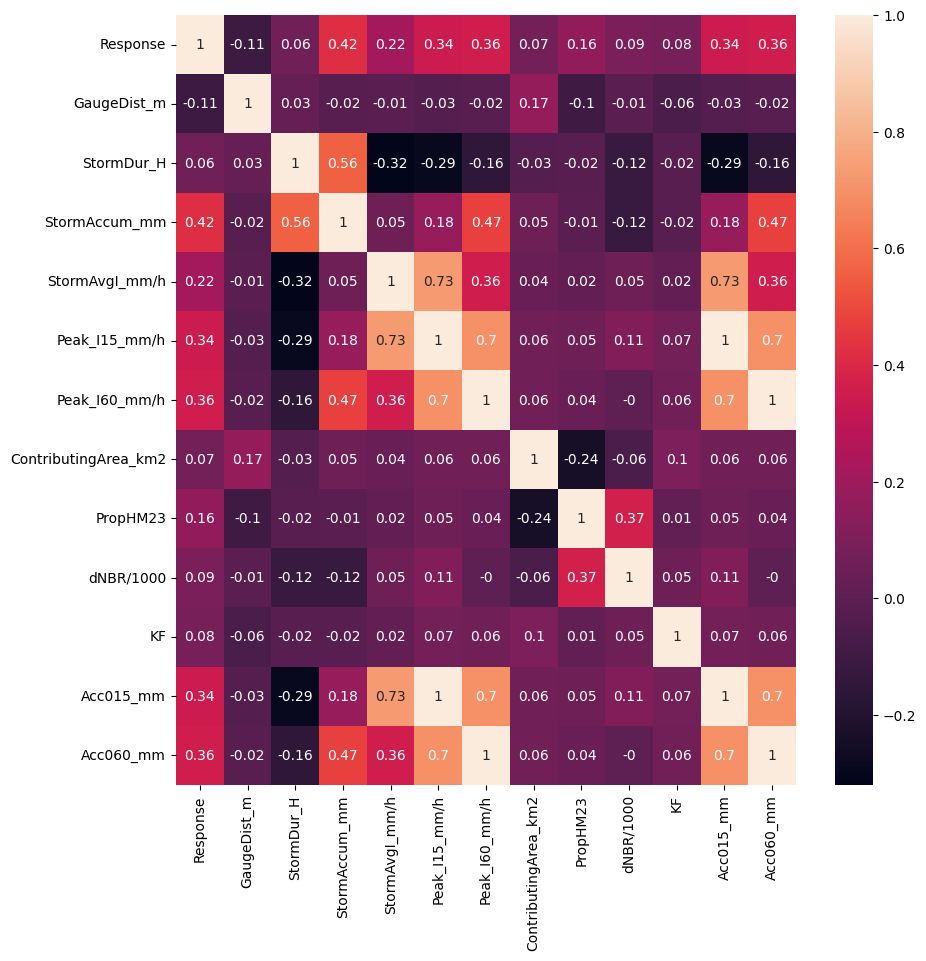

In [ ]:
plt.figure(figsize = (10,10))
correlation_matrix = df.corr().round(2)
sns.heatmap(data = correlation_matrix, annot = True)

## Decision Tree

In [ ]:
# 'Response' is the target
X = df.drop('Response', axis = 1)
y = df['Response']

**accuracy** = (TP + TN) / (TP + FP +TN + TP)

{good for when classes are balanced and not skewed}

**precision** = TP / (TP + FP)

{when we want to be very sure in our POSITIVE predictions}

**recall** = TP / (TP + FN)

{want to classify as many POSITIVES as possible}

**F1** = 2[(precision * recall)/(precision + recall)]

{when you want HIGH PRECISION & HIGH RECALL}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 13)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1085, 12), (1085,), (465, 12), (465,))

In [ ]:
model = DecisionTreeClassifier(random_state = 13)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=13)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred[:10]

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [ ]:
y_pred.sum()

109

In [ ]:
pd.Series(y_pred).value_counts()

,count
0,356
1,109


In [ ]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)

Accuracy: 0.8408602150537634


In [ ]:
depth_range = range(1,21) # xv 20 times to get depth
accuracies = []
f1_scores = []
for depth in depth_range: # 20 *100 times
  numLoops = 100
  acc_dt = np.zeros(numLoops)
  f1s_dt = np.zeros(numLoops)

  for idx in range(0, numLoops): # 100 times
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    model = DecisionTreeClassifier(max_depth = depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_dt[idx] = accuracy_score(y_test, y_pred)
    f1s_dt[idx] = f1_score(y_test, y_pred)
  accuracies.append(acc_dt.mean()) # could multiply mean by 100 to make percent for graph
  f1_scores.append(f1s_dt.mean())  # but not going to do that
  print(f'Accuracy: {acc_dt.mean()}')
  print(f'F1: {f1s_dt.mean()}')
# picked depth, creating 20 models, accuracy calculated for each, then mean calculated

Accuracy: 0.7796989247311827
F1: 0.41684892822993197
Accuracy: 0.8184731182795698
F1: 0.361406708220334
Accuracy: 0.8183870967741934
F1: 0.5306505497286992
Accuracy: 0.8345376344086023
F1: 0.5689819767336054
Accuracy: 0.8418494623655914
F1: 0.6025717227746838
Accuracy: 0.8538279569892474
F1: 0.6445491481085719
Accuracy: 0.8561720430107527
F1: 0.6503437072453988
Accuracy: 0.8568602150537632
F1: 0.6533633332160936
Accuracy: 0.8585591397849464
F1: 0.6605920115226516
Accuracy: 0.8601290322580646
F1: 0.6659314203339097
Accuracy: 0.857010752688172
F1: 0.6646447764548775
Accuracy: 0.8563870967741937
F1: 0.663671865430085
Accuracy: 0.8609462365591399
F1: 0.6732380802376248
Accuracy: 0.8606451612903228
F1: 0.6710544607248629
Accuracy: 0.858
F1: 0.6675579364575123
Accuracy: 0.8588387096774193
F1: 0.6718673944977462
Accuracy: 0.8608387096774192
F1: 0.6755376718370967
Accuracy: 0.85552688172043
F1: 0.6633261364817835
Accuracy: 0.8599354838709676
F1: 0.675625798425839
Accuracy: 0.8610752688172043
F

### line graph

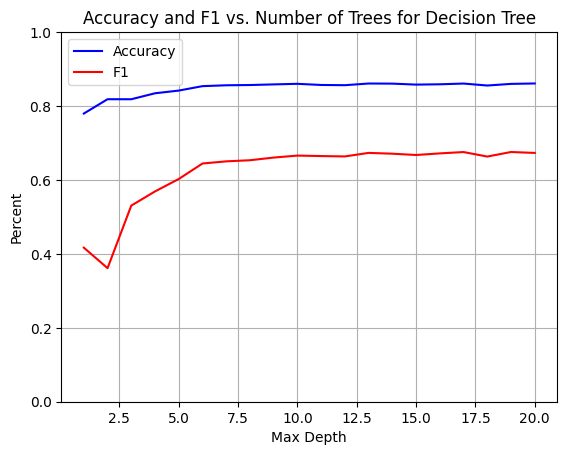

In [ ]:
plt.figure()
plt.plot(depth_range, accuracies, color = 'b', label = 'Accuracy')
plt.plot(depth_range, f1_scores, color = 'r', label = 'F1')
plt.ylabel('Percent')
plt.legend()
plt.xlabel('Max Depth')
plt.grid()
plt.ylim(0,1)
plt.title('Accuracy and F1 vs. Number of Trees for Decision Tree')
plt.savefig('dt_30_acc_f1_line_graph.png')
plt.show()

In [ ]:
# cross validation
numLoops = 100

acc_dt = np.zeros(numLoops)
f1s_dt = np.zeros(numLoops)
for idx in range(0, numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
  model = DecisionTreeClassifier(max_depth = 8)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  acc_dt[idx] = accuracy_score(y_test, y_pred)
  f1s_dt[idx] = f1_score(y_test, y_pred)
print(f'Accuracy: {acc_dt.mean()}')
print(f'F1: {f1s_dt.mean()}')

Accuracy: 0.8593548387096774
F1: 0.6617485606828316


In [ ]:
plot_dt = pd.DataFrame(zip(acc_dt, f1s_dt))
plot_dt

,0,1
0,0.845161,0.625000
1,0.868817,0.693467
2,0.886022,0.693642
3,0.853763,0.617978
4,0.849462,0.635417
...,...,...
95,0.858065,0.666667
96,0.890323,0.743719
97,0.870968,0.647059
98,0.862366,0.670103


### histogram

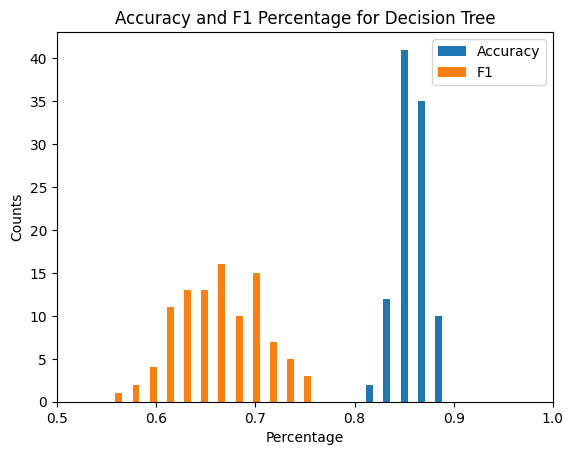

In [ ]:
plt.hist(plot_dt, bins = 20)
plt.legend(['Accuracy', 'F1'])
plt.ylabel('Counts')
plt.xlabel('Percentage')
plt.title('Accuracy and F1 Percentage for Decision Tree')
plt.xlim(0.5,1)
plt.savefig('dt_30_acc_f1_hist_graph.png')
plt.show()

### trees

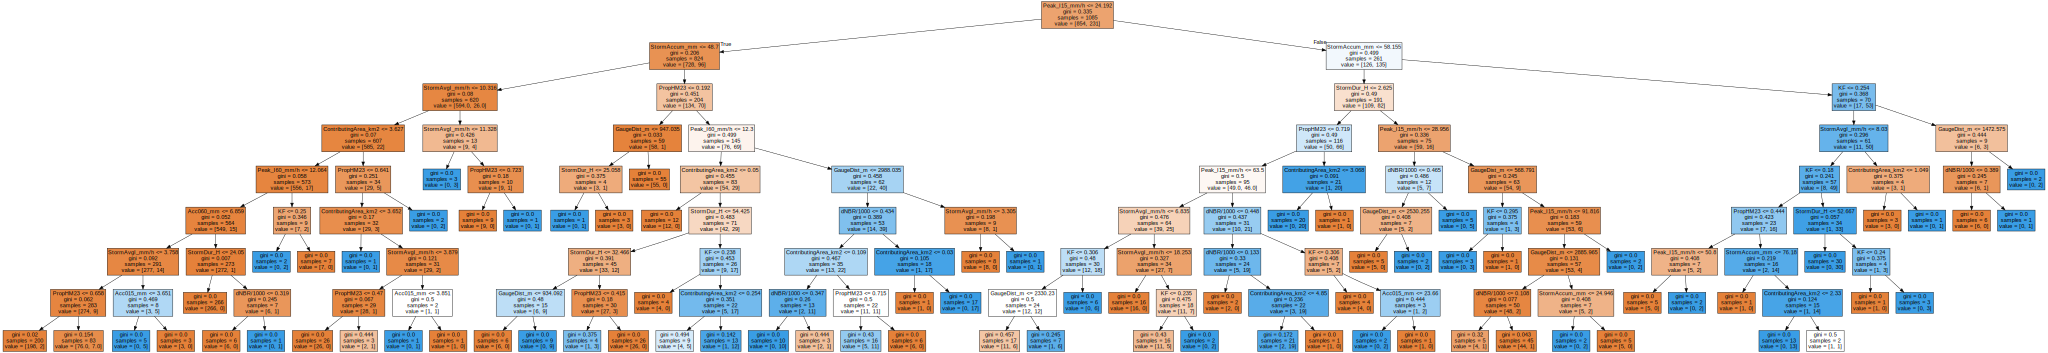

In [ ]:
display(
  graphviz.Source(
    tree.export_graphviz(
      model,
      feature_names = X.columns,
      filled = True,
    )
  )
)
# 100th DT out of all the ones from model (last one)

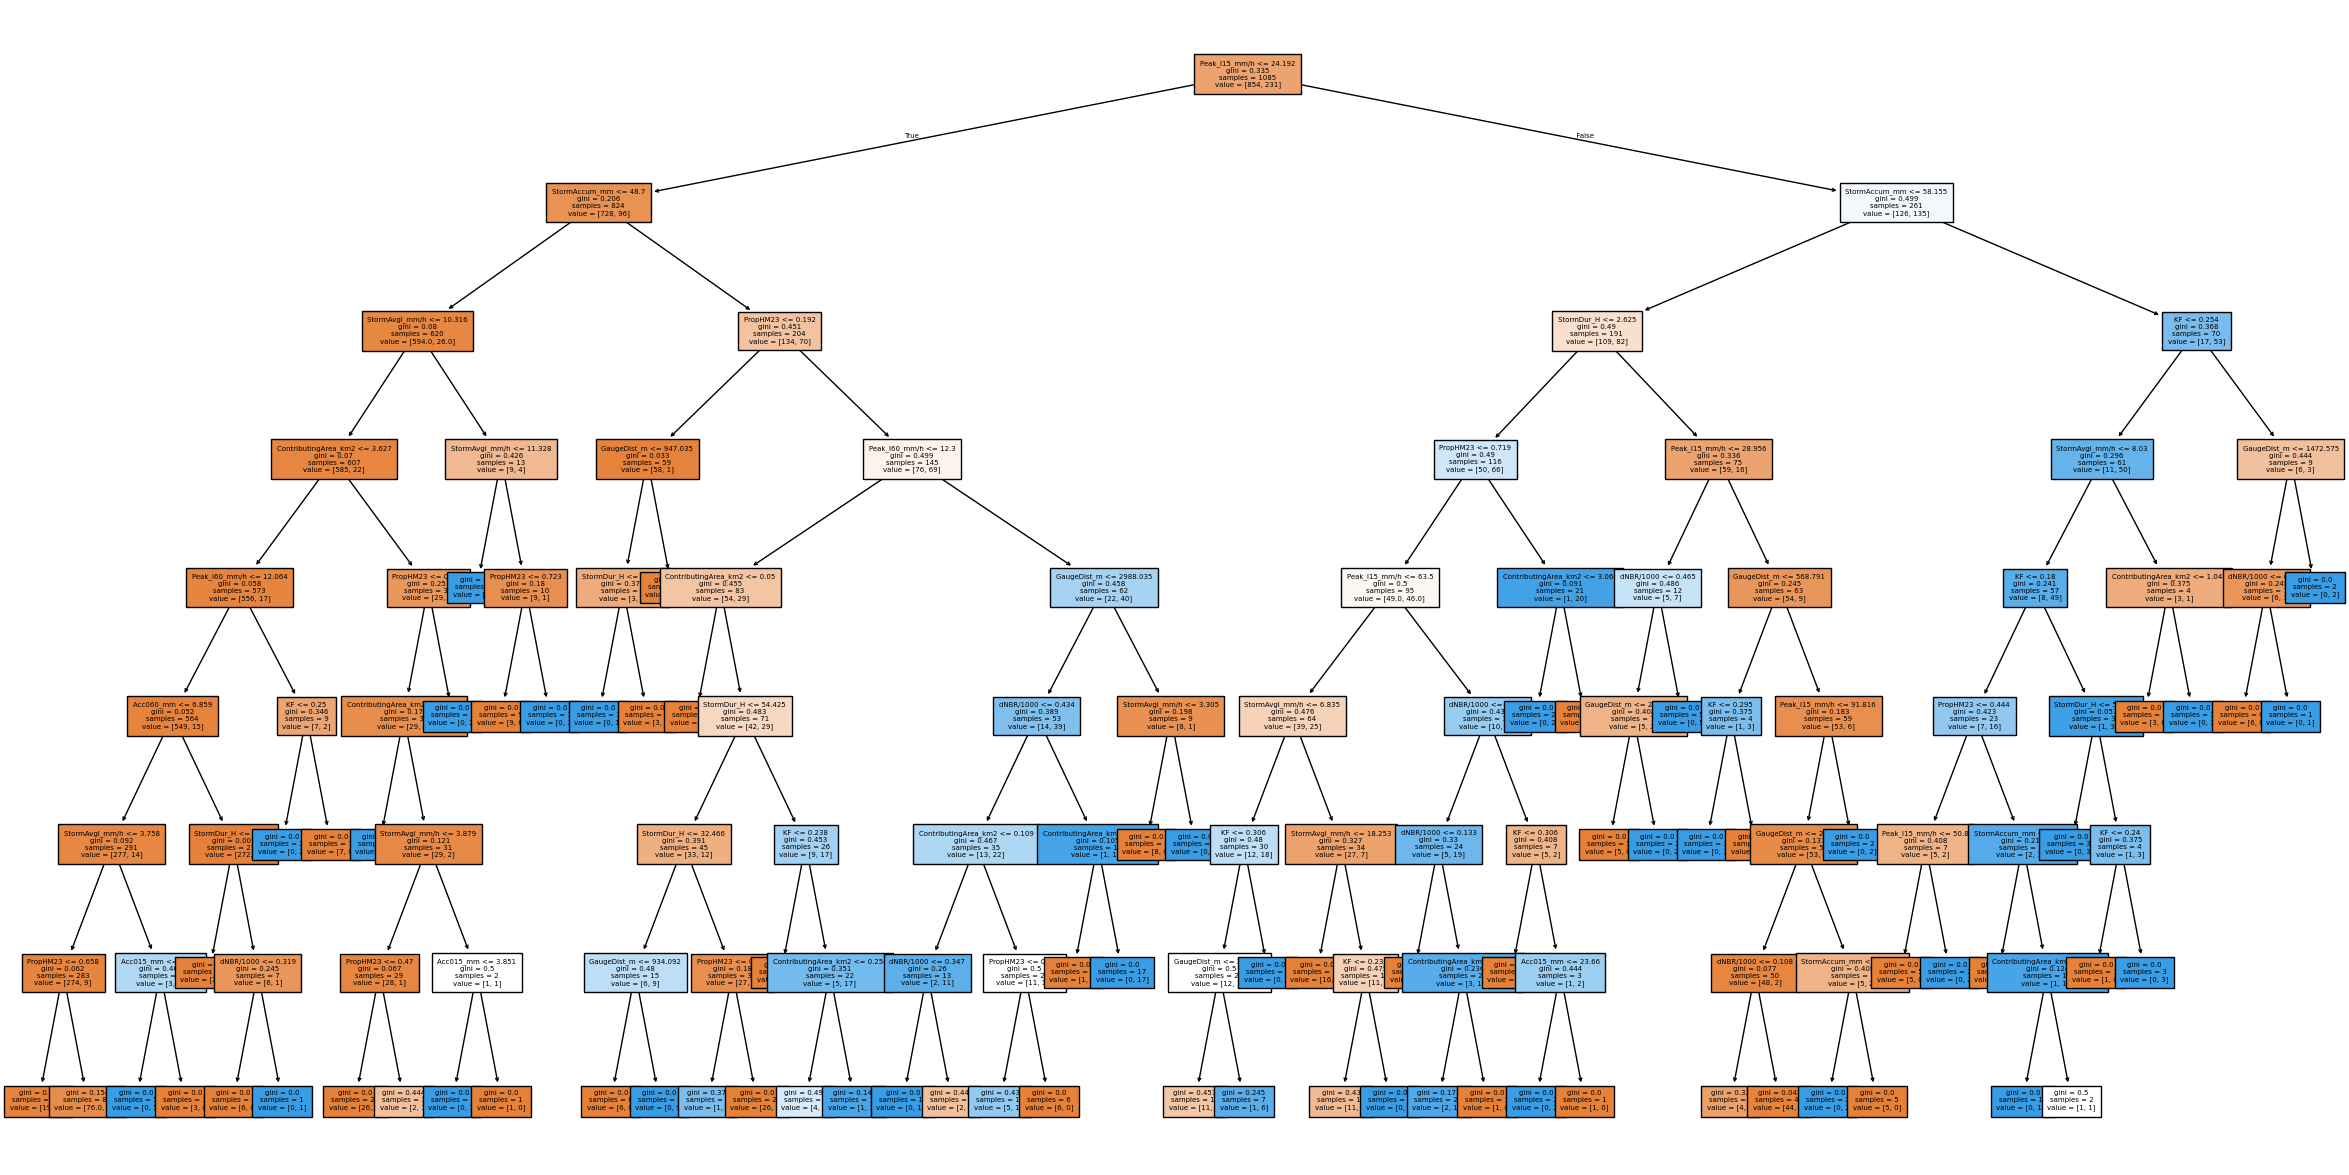

In [ ]:
# skinny tree
plt.figure(figsize = (30,15))
# plot is as a .svg -- at the end
tree_plot = tree.plot_tree(
    model,
    feature_names = X.columns,
    filled = True,
    fontsize = 5,
)
plt.savefig('dt_30_tree.png')

## Random Forest

In [ ]:
X = df.drop('Response', axis = 1)
y = df['Response']

In [ ]:
# no max_depth inputted for model
numLoops = 100
acc_rf = np.zeros(numLoops)
f1s_rf = np.zeros(numLoops)
for idx in range(0, numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
  model = RandomForestClassifier()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  acc_rf[idx] = accuracy_score(y_test, y_pred)
  f1s_rf[idx] = f1_score(y_test, y_pred)
print(f'Accuracy: {acc_rf.mean()}')
print(f'F1: {f1s_rf.mean()}')

Accuracy: 0.8958924731182795
F1: 0.7468489881985281


In [ ]:
numLoops = 100
acc_rf = np.zeros(numLoops)
f1s_rf = np.zeros(numLoops)
for idx in range(0, numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
  model = RandomForestClassifier(max_depth = 8)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  acc_rf[idx] = accuracy_score(y_test, y_pred)
  f1s_rf[idx] = f1_score(y_test, y_pred)
print(f'Accuracy: {acc_rf.mean()}')
print(f'F1: {f1s_rf.mean()}')

Accuracy: 0.8850752688172041
F1: 0.7129029097577714


In [ ]:
# using accuracy as metric, not f1
# choosing number of trees
# cross validation
num_trees = range(10,100,10)
cv_loops = 100
acc_rf = np.zeros(len(num_trees))
f1s_rf = np.zeros(len(num_trees))

for n, trees in enumerate(num_trees): # 9 diff sizeof f
  acc = np.zeros(cv_loops)
  f1 = np.zeros(cv_loops)
  np.random.seed(13)
  for i in range(cv_loops): #100 xv
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    rfModel = RandomForestClassifier(n_estimators = trees)
    rfModel.fit(X_train, y_train)
    y_pred_rf = rfModel.predict(X_test)
    acc[i] = accuracy_score(y_test, y_pred_rf)
    f1[i] = f1_score(y_test, y_pred_rf)
  print(trees, 'trees finished')
  acc_rf[n] = acc.mean()
  f1s_rf[n] = f1.mean()

10 trees finished
20 trees finished
30 trees finished
40 trees finished
50 trees finished
60 trees finished
70 trees finished
80 trees finished
90 trees finished


### line graph

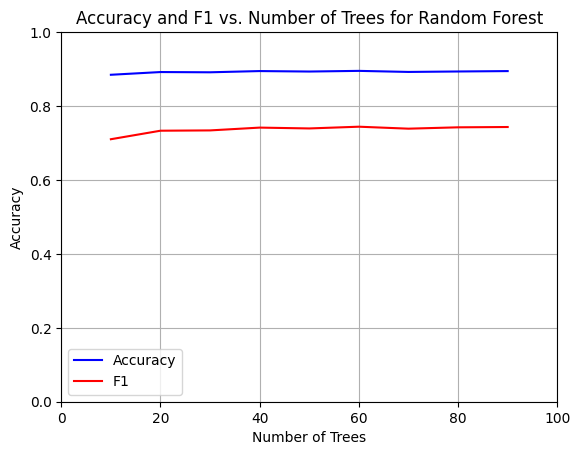

In [ ]:
plt.figure()
plt.plot(num_trees, acc_rf, color = 'b', label = 'Accuracy')
plt.plot(num_trees, f1s_rf, color = 'r', label = 'F1')

# plt.plot(num_trees, acc_rf, f1s_rf_1)
plt.title('Accuracy and F1 vs. Number of Trees for Random Forest')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.xlim(0,100)
plt.ylim(0,1)
plt.legend()
plt.grid()
plt.savefig('rf_30_acc_f1_line_graph.png')
plt.show()

In [ ]:
print(f'Accuracy with 10 trees: {acc_rf[0]}')

Accuracy with 10 trees: 0.8846021505376345


In [ ]:
len(rfModel.estimators_)

90

In [ ]:
numLoops = 100
acc_rf = np.zeros(numLoops)
f1s_rf = np.zeros(numLoops)
for idx in range(0, numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
  model = RandomForestClassifier(max_depth = 10)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  acc_rf[idx] = accuracy_score(y_test, y_pred)
  f1s_rf[idx] = f1_score(y_test, y_pred)
print(f'Accuracy: {acc_rf.mean()}')
print(f'F1: {f1s_rf.mean()}')

Accuracy: 0.8924946236559141
F1: 0.7374975247615316


### tree

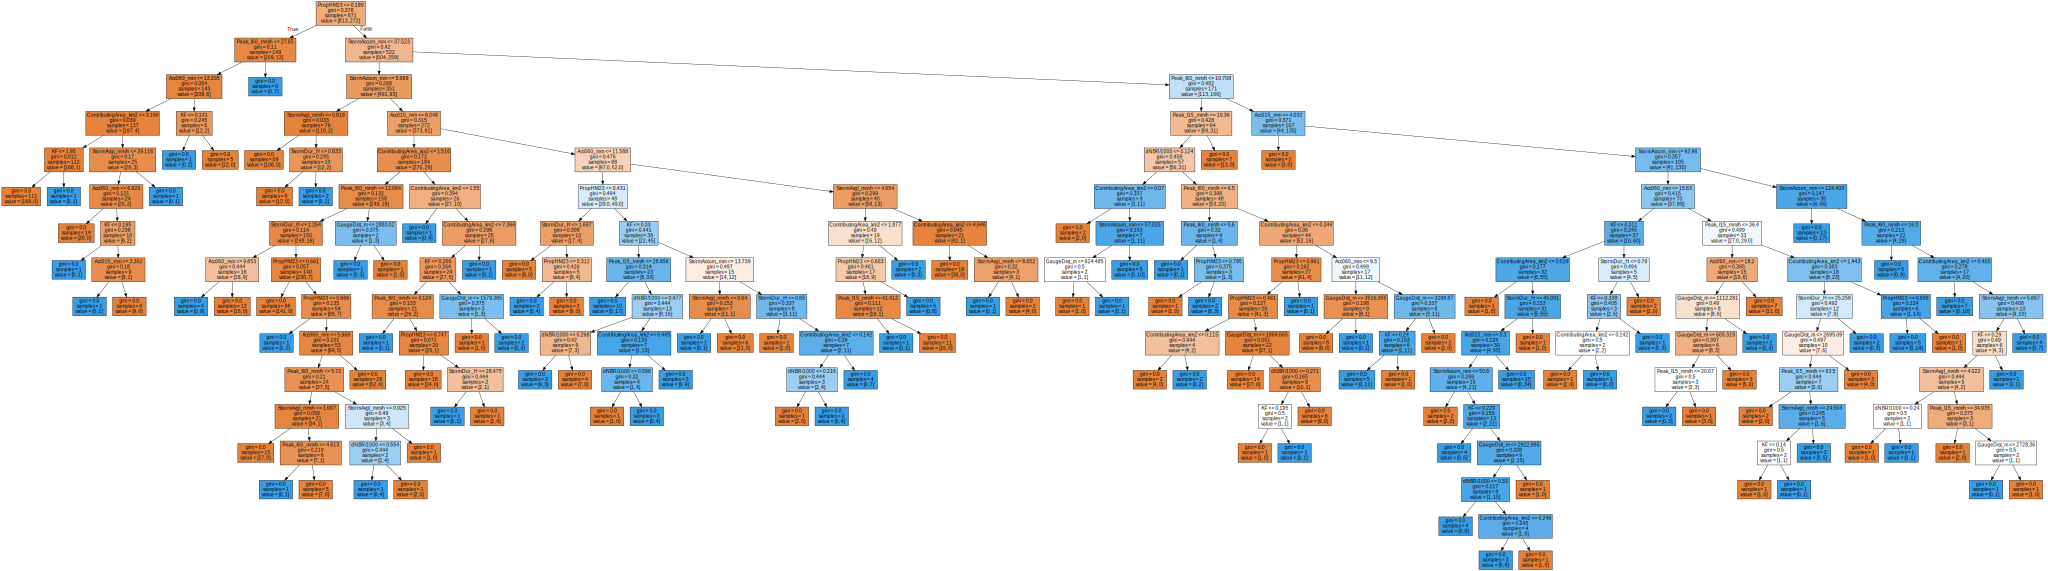

In [ ]:
display(
  graphviz.Source(
    tree.export_graphviz(
      rfModel.estimators_[89],
      feature_names = X.columns,
      filled = True,
    )
  )
)

### histogram

In [ ]:
plot_rf = pd.DataFrame(zip(acc_rf, f1s_rf))
plot_rf

,0,1
0,0.873118,0.662857
1,0.898925,0.761421
2,0.907527,0.772487
3,0.905376,0.765957
4,0.894624,0.737968
...,...,...
95,0.909677,0.776596
96,0.875269,0.710000
97,0.898925,0.740331
98,0.896774,0.757576


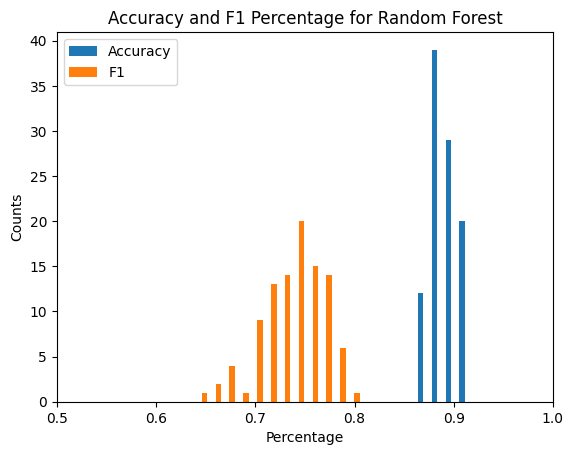

In [ ]:
plt.hist(plot_rf, bins = 20)
plt.legend(['Accuracy', 'F1'])
plt.xlim(0.5,1)
plt.ylabel('Counts')
plt.xlabel('Percentage')
plt.title('Accuracy and F1 Percentage for Random Forest')
plt.savefig('rf_30_acc_f1_hist_graph.png')
plt.show() # same as d.t.
# save each graph, save then plot

### feature importance

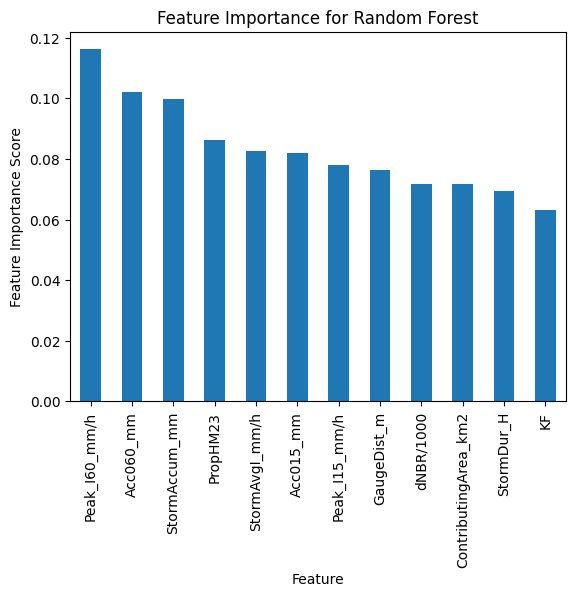

In [ ]:
# importance predictors
importances = rfModel.feature_importances_
forest_importances = pd.Series(importances, index = X.columns)
plt.figure()
forest_importances.sort_values(ascending = False).plot.bar()
plt.title('Feature Importance for Random Forest')
plt.ylabel('Feature Importance Score')
plt.xlabel('Feature')
plt.savefig('rf_30_FI.png')
plt.show()

In [ ]:
(forest_importances.sort_values(ascending = False) * 100).cumsum()

,0
Peak_I60_mm/h,11.616925
Acc060_mm,21.827983
StormAccum_mm,31.802019
PropHM23,40.435660
StormAvgI_mm/h,48.703386
Acc015_mm,56.895021
Peak_I15_mm/h,64.714301
GaugeDist_m,72.369152
dNBR/1000,79.544812
ContributingArea_km2,86.718025


## XGBoost

In [ ]:
X = df.drop('Response', axis = 1)
y = df['Response']

In [ ]:
numLoops = 100
acc_xgb = np.zeros(numLoops)
for idx in range(0, numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
  xgbr = xgb.XGBClassifier(objective = 'binary:logistic', verbosity = 0)
  xgbr.fit(X_train, y_train)
  y_pred_xgb = xgbr.predict(X_test)
  acc_xgb[idx] = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy: {acc_xgb.mean()}')

Accuracy: 0.8900000000000001


In [ ]:
# specifying parameters we want to try and their ranges
param_test = {
    'max_depth' : [3, 4, 5, 6, 7],
    'learning_rate' : [0.1, 0.2, 0.3, 0.4],
    'n_estimators' : [20, 40, 60, 80, 100, 120, 140],
}
# grid search
gsearch = GridSearchCV(
    estimator = xgb.XGBClassifier(objective = 'binary:logistic'),
    param_grid = param_test,
    scoring = 'accuracy',
    cv = 5,
)
# fit to the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 13)
model = gsearch.fit(X_train, y_train)
# show results
print(model.best_params_)

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}


In [ ]:
params = model.best_params_
params

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}

In [ ]:
# fitting XGBoost model with the best parameters
# cross validation
numLoops = 100
acc_xgb = np.zeros(numLoops)
f1s_xgb = np.zeros(numLoops)
for idx in range(0, numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
  xgbc = xgb.XGBClassifier(
      objective = 'binary:logistic',
      verbosity = 0,
      **params,
  )
  xgbc.fit(X_train, y_train)
  y_pred_xgb = xgbc.predict(X_test)
  acc_xgb[idx] = accuracy_score(y_test, y_pred_xgb)
  f1s_xgb[idx] = f1_score(y_test, y_pred_xgb)
print(f'Accuracy: {acc_xgb.mean()}')
print(f'F1: {f1s_xgb.mean()}')

Accuracy: 0.8907956989247313
F1: 0.7332846715670152


### histogram

In [ ]:
plot_xgb = pd.DataFrame(zip(acc_xgb, f1s_xgb))
plot_xgb

,0,1
0,0.888172,0.726316
1,0.905376,0.768421
2,0.879570,0.708333
3,0.905376,0.784314
4,0.877419,0.654545
...,...,...
95,0.868817,0.702439
96,0.873118,0.697436
97,0.903226,0.786730
98,0.903226,0.756757


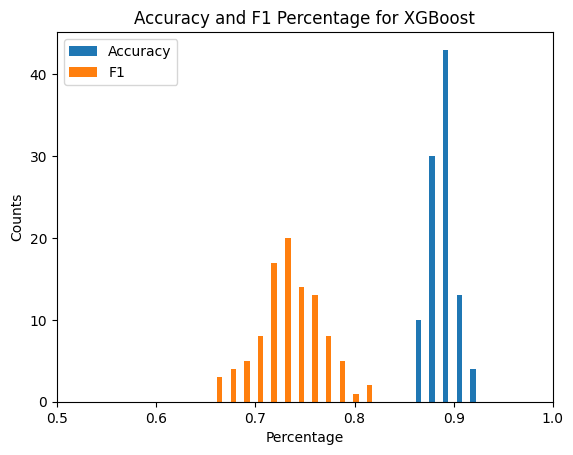

In [ ]:
plt.hist(plot_xgb, bins = 20)
plt.legend(['Accuracy', 'F1'])
plt.xlim(0.5,1)
plt.ylabel('Counts')
plt.xlabel('Percentage')
plt.title('Accuracy and F1 Percentage for XGBoost')
plt.savefig('xgb_30_acc_f1_hist_graph.png')
plt.show()

### feature importance

<ipython-input-45-d1ec794ab4c4>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


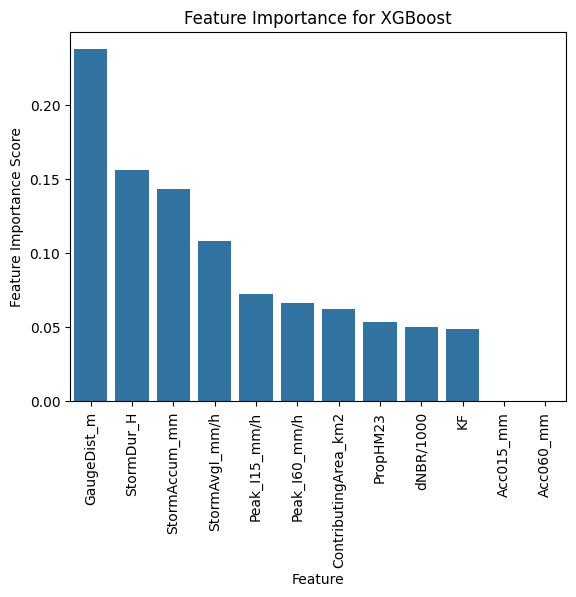

In [ ]:
# feature importance
feat_import = pd.Series(xgbc.feature_importances_, index = X.columns)
plt.figure()
ax = sns.barplot(x = feat_import.index, y = feat_import.sort_values(ascending = False).values)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.xlabel('Feature')
plt.title('Feature Importance for XGBoost')
plt.ylabel('Feature Importance Score')
plt.savefig('xgb_30_FI.png')
plt.show();

In [ ]:
(feat_import.sort_values(ascending = False) * 100).cumsum()

,0
Peak_I15_mm/h,23.776684
Peak_I60_mm/h,39.419556
StormAccum_mm,53.758850
StormAvgI_mm/h,64.618980
PropHM23,71.857643
KF,78.516983
StormDur_H,84.742798
ContributingArea_km2,90.123573
GaugeDist_m,95.137428
dNBR/1000,100.000000
